##### Consider only the below columns and prepare a prediction model for predicting Price.

##### Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

In [5]:
data = pd.read_csv("D:\\Data Science\\0 - ASSIGNMENTS\\Assignment5-Multi Linear Regression\\ToyotaCorolla.csv",encoding='latin1')

In [6]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [9]:
data.shape

(1436, 38)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
data = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [58]:
data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
data = data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT','Weight':'WT'},axis=1)

In [9]:
data

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
data.corr() #Correlation analysis

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
WT,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [99]:
data.isna().sum()

Price    0
Age      0
KM       0
HP       0
CC       0
Doors    0
Gears    0
QT       0
WT       0
dtype: int64

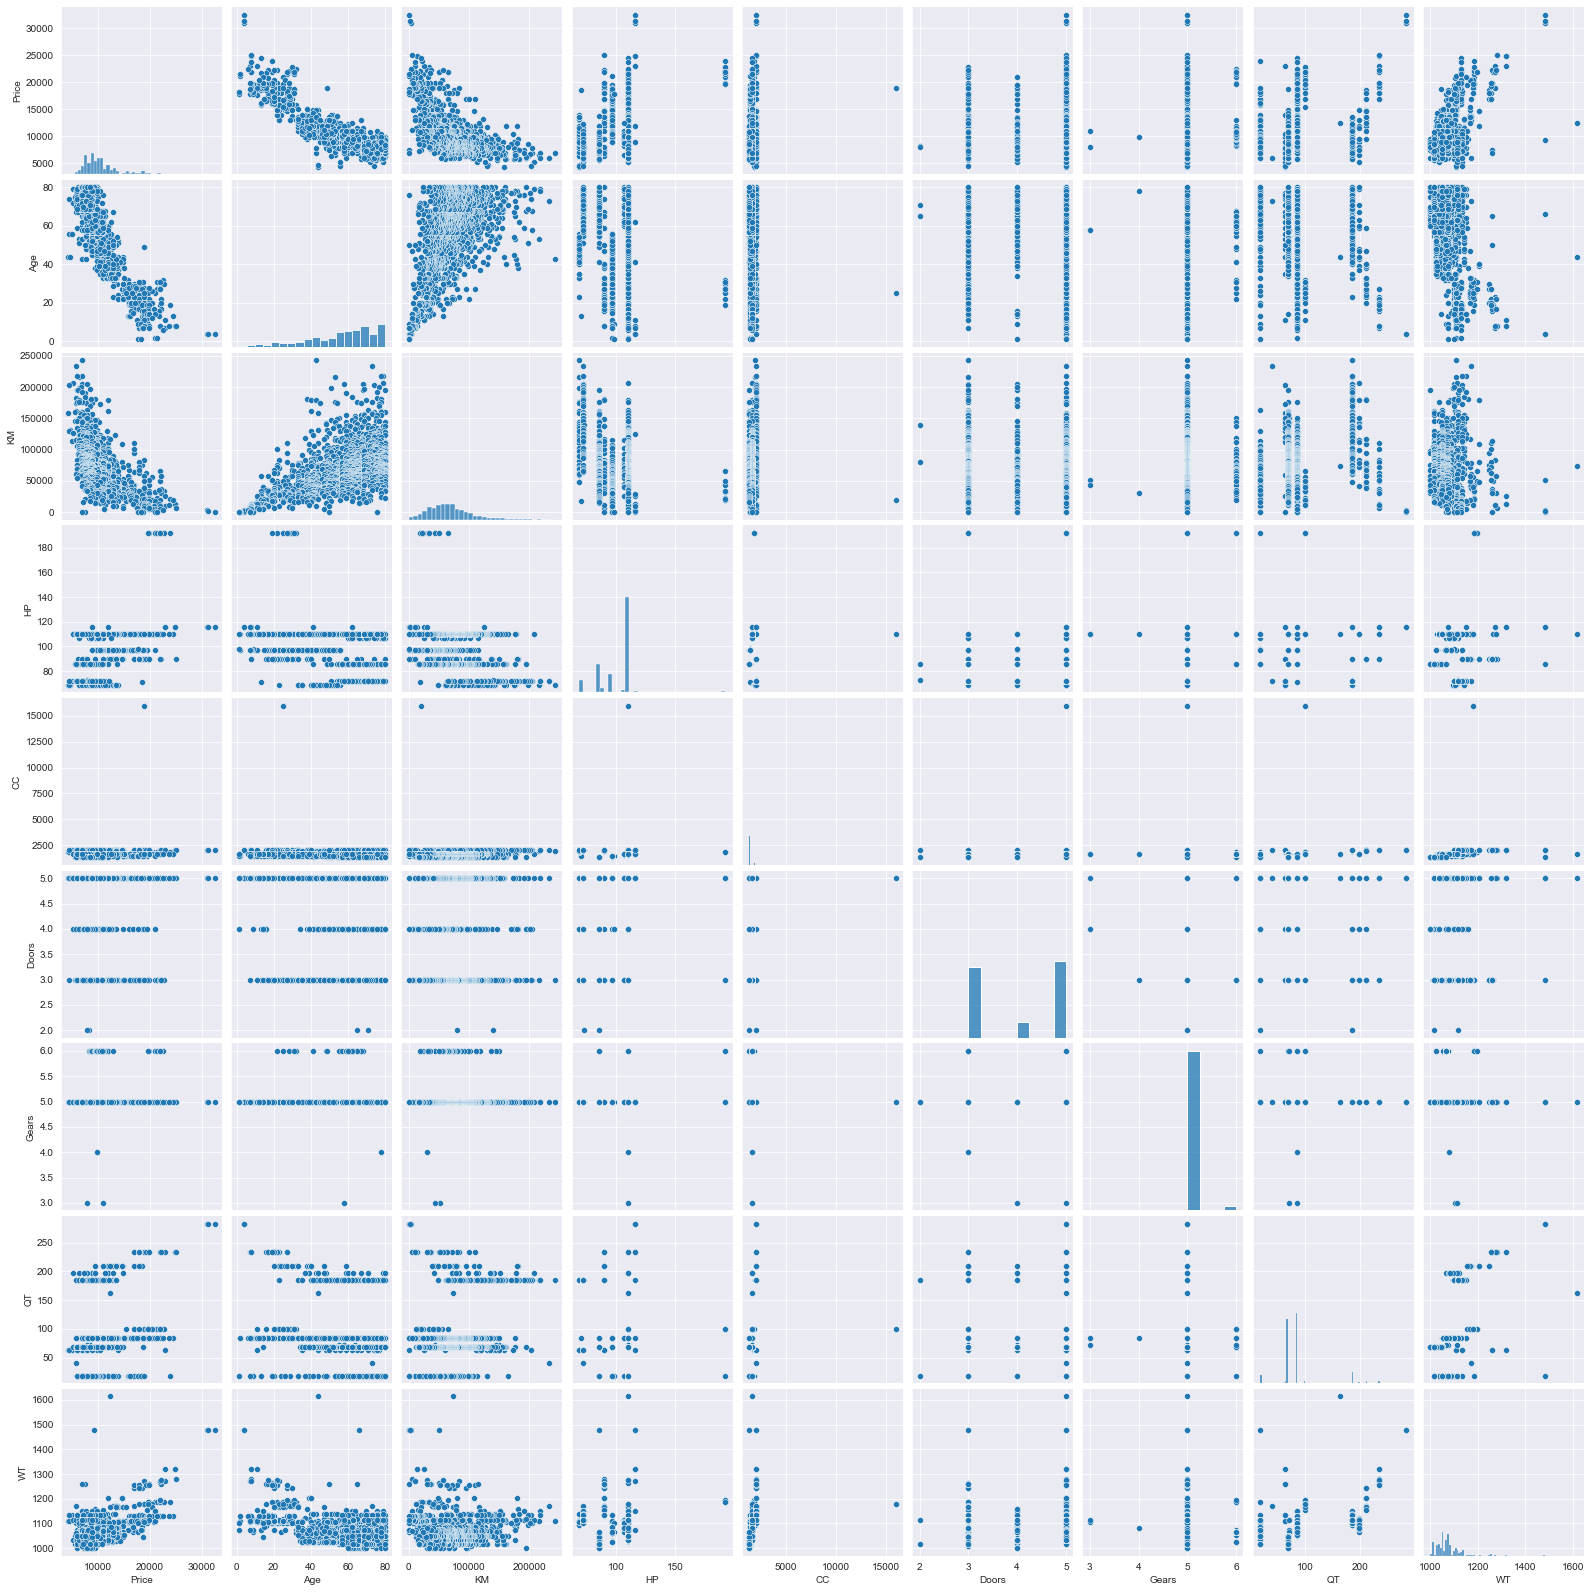

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [76]:
#model building (phase 1)
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=data).fit()

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:45:34   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
WT            16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model=smf.ols('Price~CC',data = data).fit()   
print(model.tvalues, '\n', model.pvalues) 

Intercept    24.694090
CC            4.824822
dtype: float64 
 Intercept    1.766912e-112
CC            1.550808e-06
dtype: float64


In [13]:
model=smf.ols('Price~Doors',data = data).fit()
print(model.tvalues, '\n', model.pvalues) 

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [14]:
model=smf.ols('Price~CC+Doors',data= data).fit()
print(model.tvalues, '\n', model.pvalues) 

Intercept    12.620704
CC            4.340400
Doors         6.816153
dtype: float64 
 Intercept    1.056885e-34
CC           1.521992e-05
Doors        1.373469e-11
dtype: float64


In [15]:
#VIF

rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+WT',data = data).fit().rsquared 
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+WT',data = data).fit().rsquared 
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+WT',data = data).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('CC~Age+KM+HP+Doors+Gears+QT+WT',data = data).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_d =smf.ols('Doors~Age+KM+HP+CC+Gears+QT+WT',data = data).fit().rsquared 
vif_d = 1/(1-rsq_d)

rsq_g =smf.ols('Gears~Age+KM+HP+CC+Doors+QT+WT',data = data).fit().rsquared 
vif_g = 1/(1-rsq_g)

rsq_q=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+WT',data = data).fit().rsquared 
vif_q = 1/(1-rsq_q)

rsq_w=smf.ols('WT~Age+KM+HP+CC+Doors+Gears+QT',data = data).fit().rsquared 
vif_w = 1/(1-rsq_w)

d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','WT'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_d,vif_g,vif_q,vif_w]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,WT,2.516420


In [ ]:
#VIF < 10 -> no collinearity

In [ ]:
#Residual analysis 

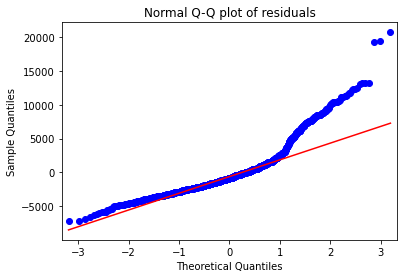

In [11]:
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
#Residual Plot for Homoscedasticity

In [16]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

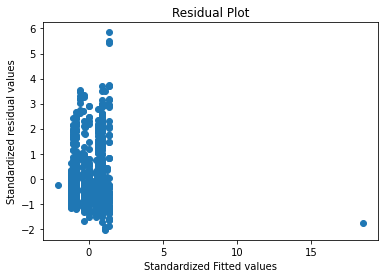

In [17]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

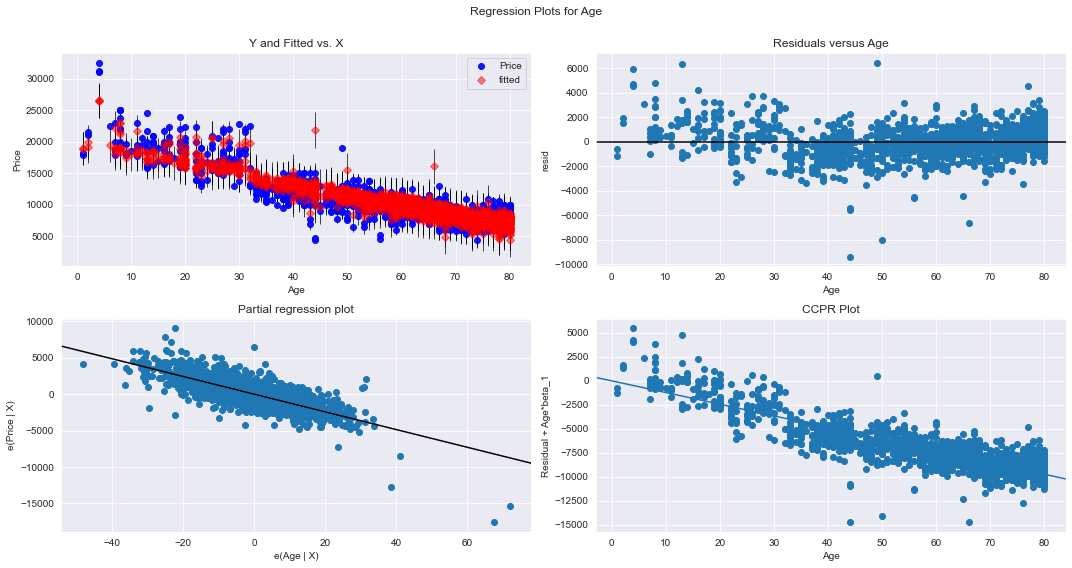

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Age", fig=fig)
plt.show()

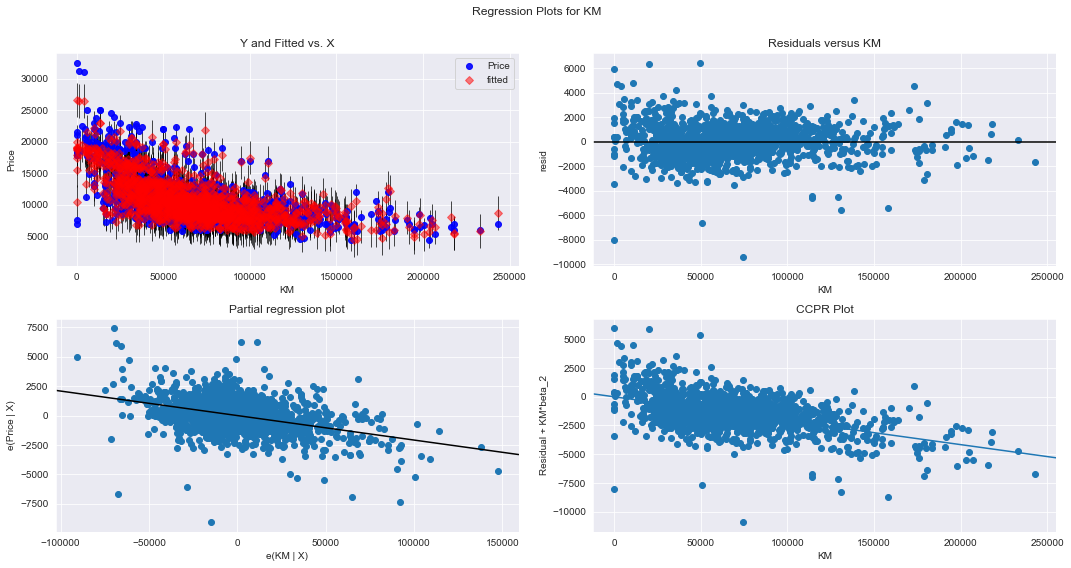

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"KM", fig=fig)
plt.show()

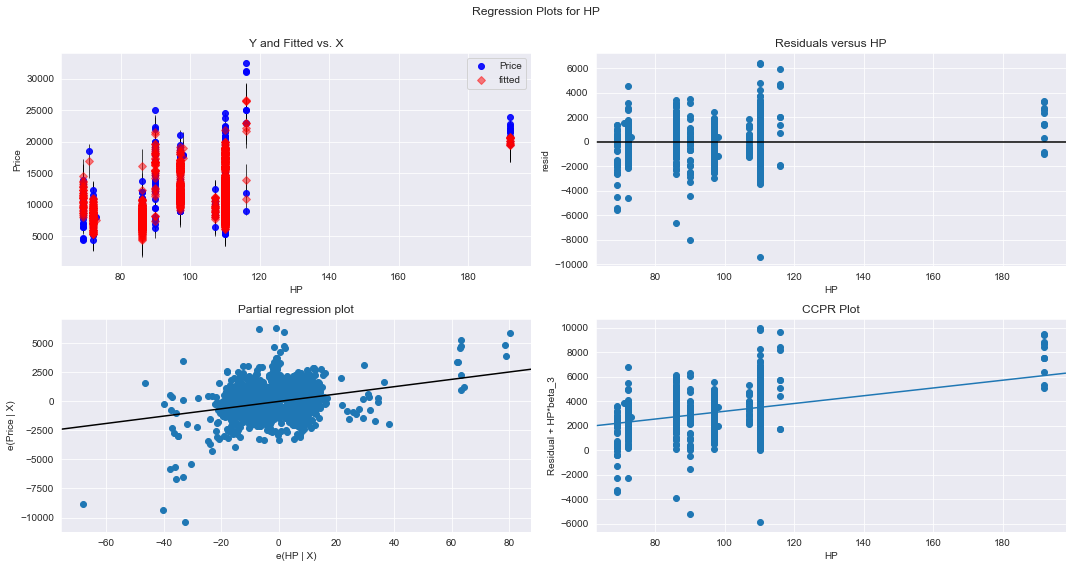

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"HP", fig=fig)
plt.show()

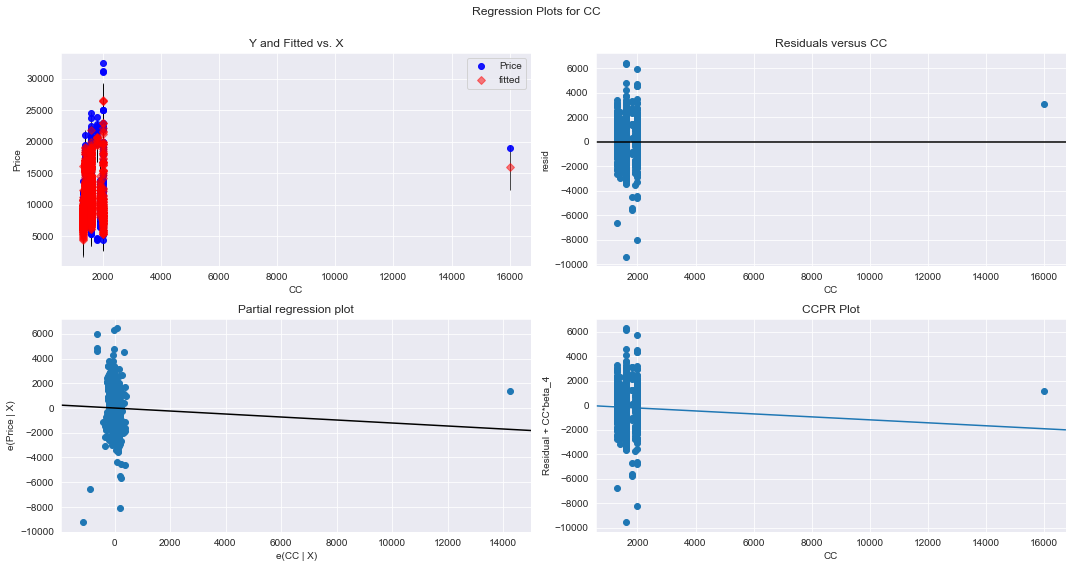

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"CC", fig=fig)
plt.show()

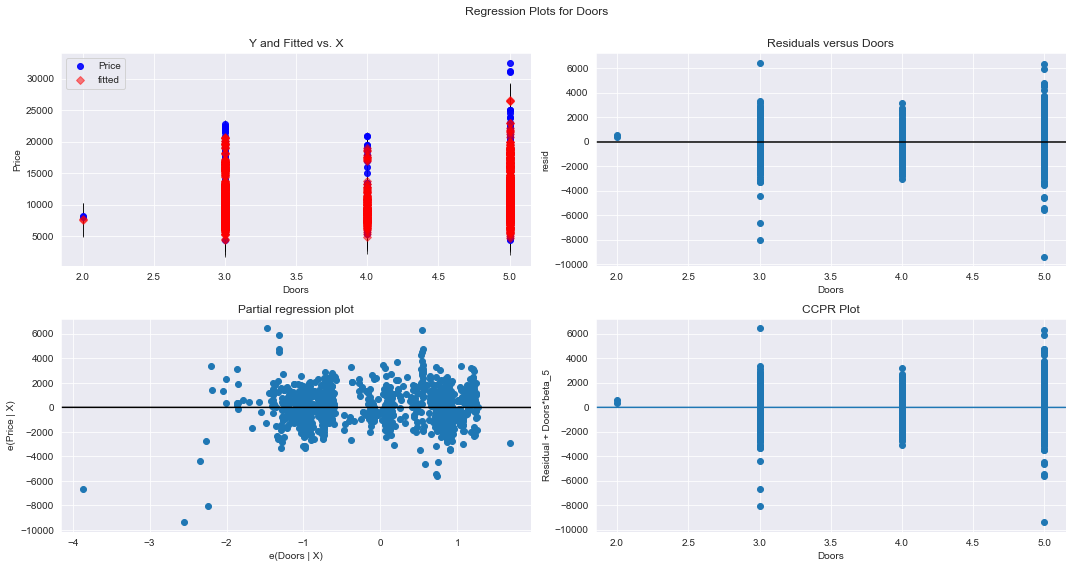

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Doors", fig=fig)
plt.show()

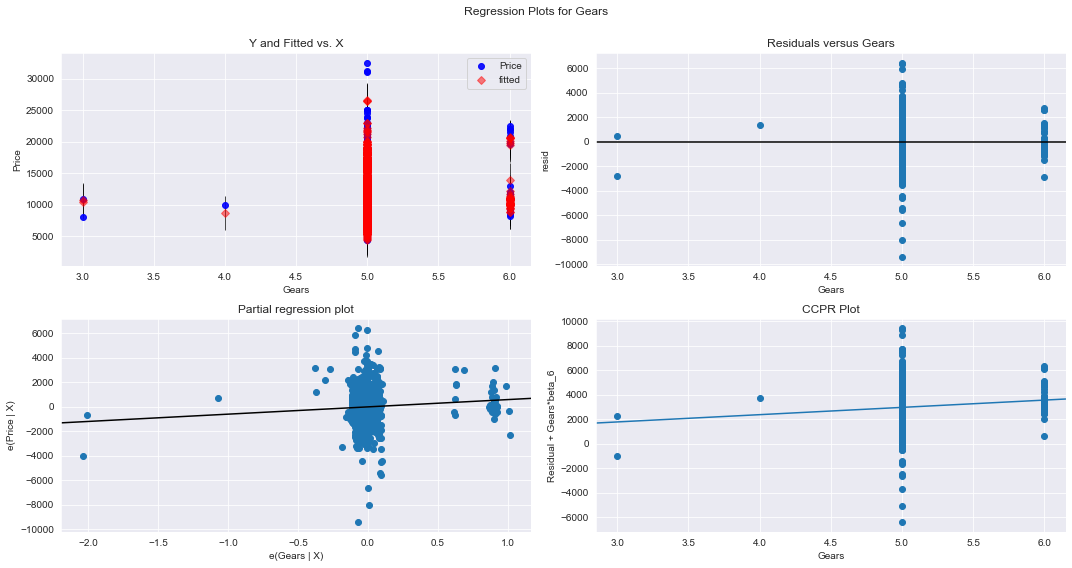

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Gears", fig=fig)
plt.show()

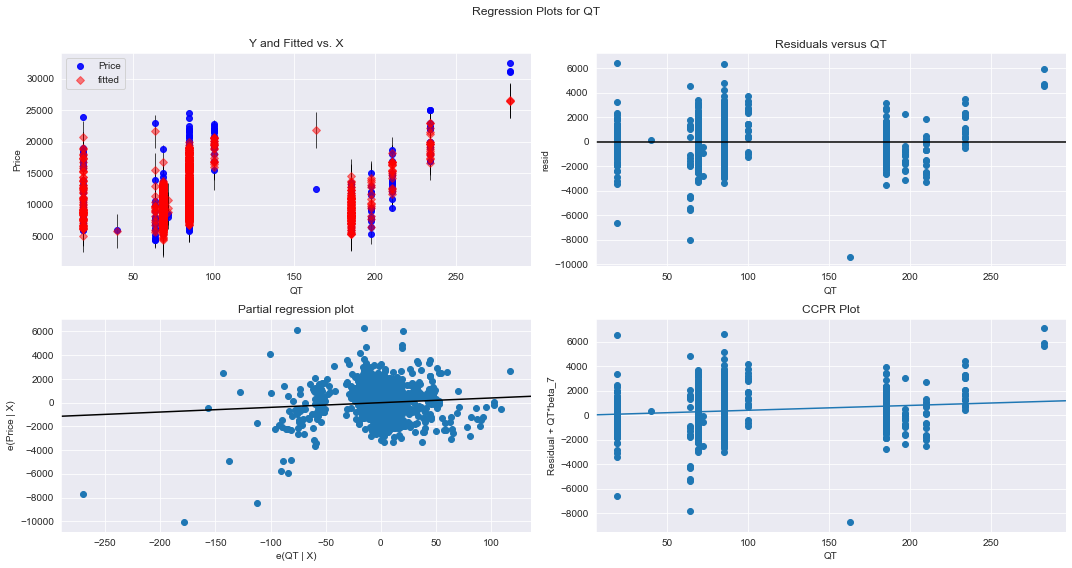

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"QT", fig=fig)
plt.show()

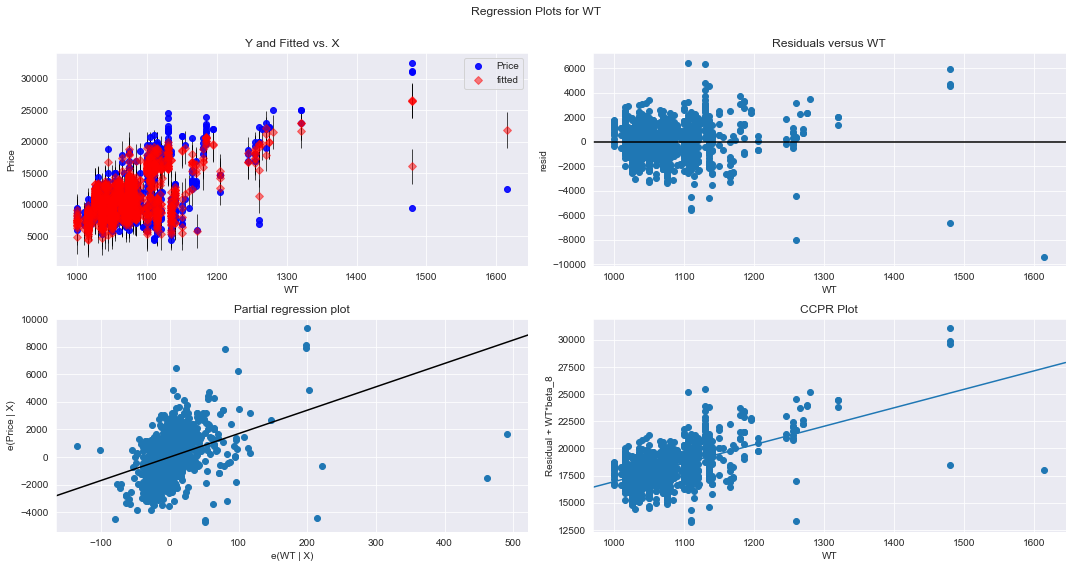

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"WT", fig=fig)
plt.show()

In [ ]:
#model deletion diagnostics
#detecting influence/outliers

#cooks distance -1

In [18]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

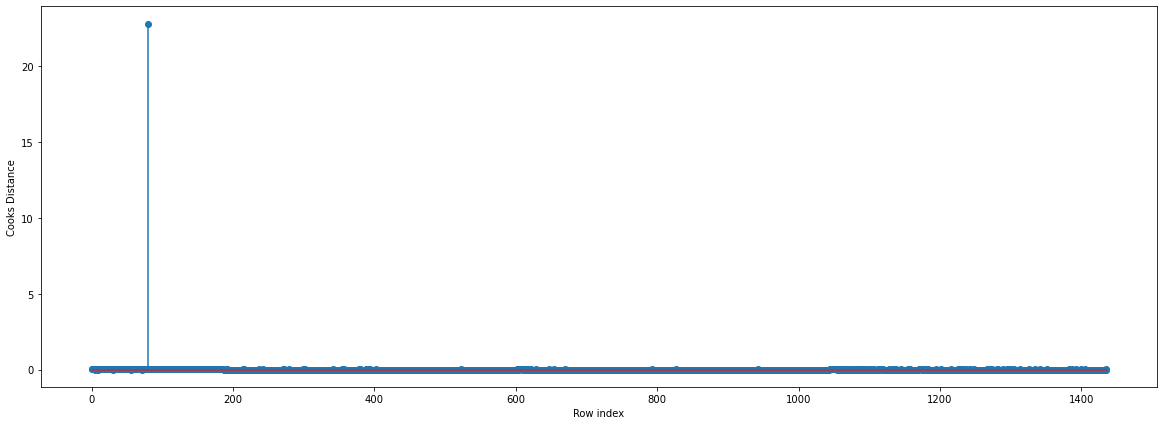

In [19]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [20]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 22.794063824977258)

In [ ]:
#high influence point

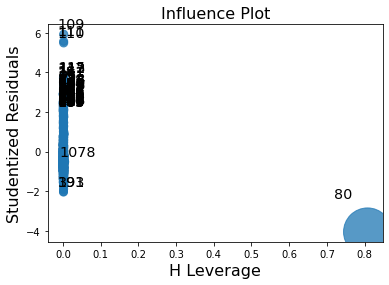

In [21]:
influence_plot(model)
plt.show()

In [22]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020891364902506964

In [ ]:
#From the above plot, it is evident that data point 80 is the influencer

In [23]:
data[data.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
80,18950,25,20019,110,16000,5,5,100,1180


In [24]:
#improving the model- 1st time

In [26]:
#Discard the data points which are influencers and reassign the row number (reset_index())
data1 = data1.drop(index=[80],axis=0).reset_index()

In [27]:
#Drop the original index
data1.drop(['index'],axis=1)

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [28]:
#build model (phase 2)

model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT', data=data1).fit()

In [29]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:35:37   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
CC            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
QT             9.0440      1.425      6.348      0.000       6.249      11.839
WT            20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#cook's distance - 2

In [31]:
model_influence_V = model1.get_influence()
(c_V, _) = model_influence_V.cooks_distance

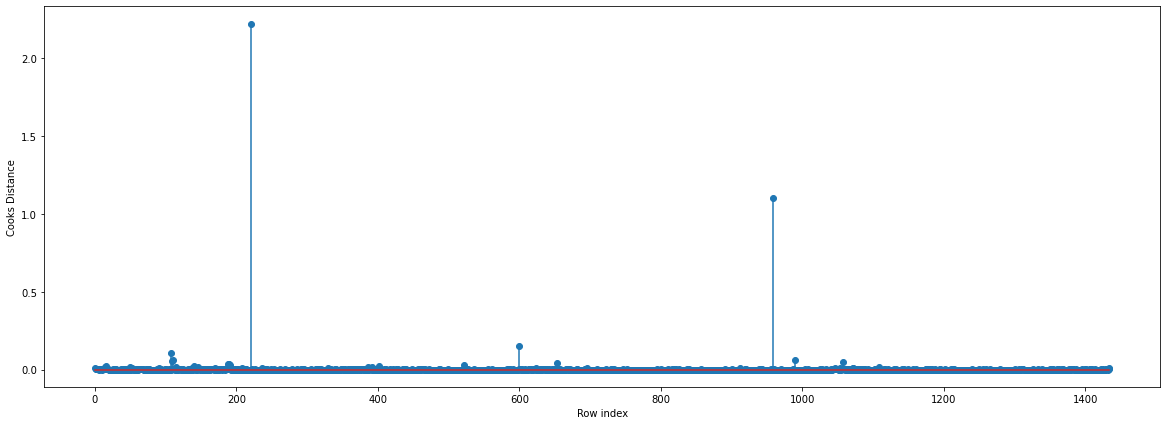

In [32]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [33]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(220, 2.2244611713001508)

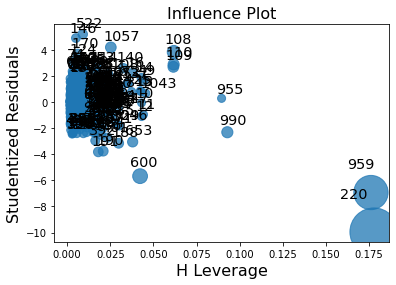

In [34]:
#high influence points
influence_plot(model1)
plt.show()

In [ ]:
#improving the model for 2nd time

In [35]:
data2=data1.drop(['index'],axis=1)

In [113]:
data2.shape

(1435, 9)

In [36]:
data2[data2.index.isin([220,959])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
220,12450,44,74172,110,1600,5,5,163,1615
959,9390,66,50806,86,1300,3,5,19,1480


In [37]:
#data2= data2.drop(data2.index[[220,959]],axis=0)
data2=data2.drop(index=[220]).reset_index()

In [38]:
data2=data2.drop(index=[959]).reset_index()

In [39]:
data2=data2.drop(['index','level_0'],axis=1)

In [40]:
data2

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
#build a model(phase 3)

In [41]:
model2=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT', data=data2).fit()

In [42]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1281.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:36:48   Log-Likelihood:                -12269.
No. Observations:                1433   AIC:                         2.456e+04
Df Residuals:                    1424   BIC:                         2.460e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.024e+04   1394.993     -7.343      0.000    -1.3e+04   -7506.578
Age         -116.5297      2.507    -46.477      0.000    -121.448    -111.611
KM            -0.0173      0.001    -14.002      0.000      -0.020      -0.015
HP            39.3327      2.815     13.974      0.000      33.811      44.854
CC            -3.2003      0.305    -10.499      0.000      -3.798      -2.602
Doors        -63.6260     38.147     -1.668      0.096    -138.457      11.204
Gears        484.8463    186.502      2.600      0.009     118.998     850.694
QT             7.9824      1.382      5.777      0.000       5.272      10.693
WT            25.0234      1.185     21.116      0.000      22.699      27.348
==============================================================================
Omnibus:                      197.730   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1764.663
Skew:                          -0.316   Prob(JB):                         0.00
Kurtosis:                       8.400   Cond. No.                     3.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#cooks distance (3)

In [43]:
model_influence_rev2 = model2.get_influence()
(c2, _) = model_influence_rev2.cooks_distance

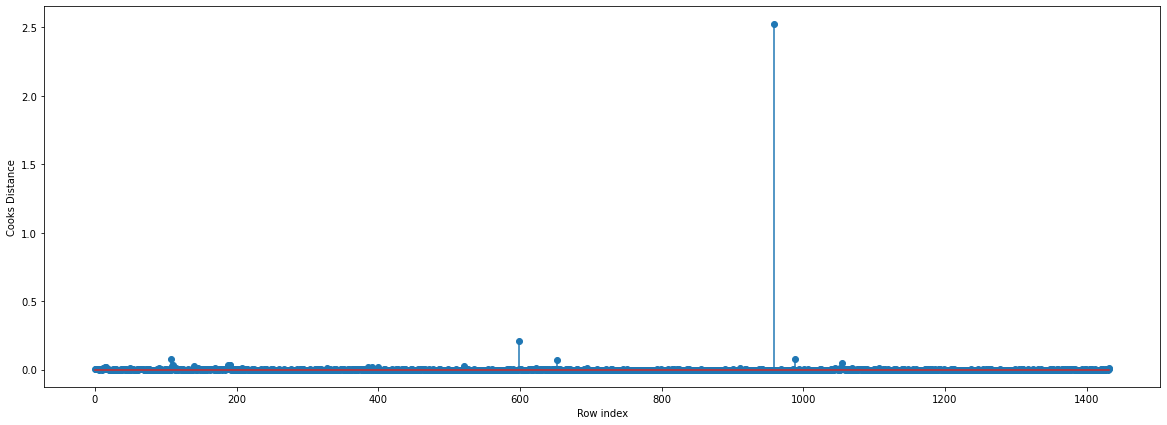

In [44]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
(np.argmax(c2),np.max(c2))

(958, 2.52845278815936)

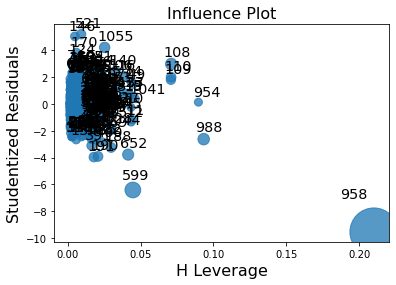

In [47]:
influence_plot(model2)
plt.show()

In [41]:
#improving model for 3rd time
#from the above plot, it is clear that 958 is influencer
data2[data2.index.isin([958])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
958,9390,66,50806,86,1300,3,5,19,1480


In [48]:
data3=data2.drop(index=[958],axis=0)

In [49]:
data3

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [63]:
#built model(phase 4)
model3=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT', data=data3).fit()

In [64]:
(model3.rsquared,model3.aic)

(0.885360200903994, 24451.162407545733)

In [ ]:
#cook distance(4)

In [65]:
model_influence_rev3 = model3.get_influence()
(c2, _) = model_influence_rev3.cooks_distance

In [66]:
np.argmax(c) , np.max(c)

(80, 22.794063824977258)

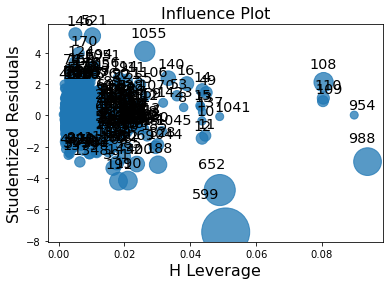

In [67]:
influence_plot(model3)
plt.show()

In [56]:
#improving the model for 4th time
#988 and 954 are the influencers frome the above plot
data3[data3.index.isin([988,954])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
954,10950,58,51421,110,1600,5,3,85,1105
988,7950,58,43000,110,1600,4,3,72,1114


In [57]:
data4=data3.drop(index=[988],axis=0)

In [58]:
data4=data4.drop(index=[954],axis=0)

In [59]:
data4

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
#build model(phase5)

In [60]:
model4=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT', data=data4).fit()

In [61]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1381.
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:38:44   Log-Likelihood:                -12196.
No. Observations:                1430   AIC:                         2.441e+04
Df Residuals:                    1421   BIC:                         2.446e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.405e+04   1465.431     -9.585      0.000   -1.69e+04   -1.12e+04
Age         -111.7314      2.474    -45.161      0.000    -116.585    -106.878
KM            -0.0170      0.001    -14.203      0.000      -0.019      -0.015
HP            37.2821      2.754     13.535      0.000      31.879      42.685
CC            -3.8111      0.301    -12.643      0.000      -4.402      -3.220
Doors       -129.7479     37.542     -3.456      0.001    -203.391     -56.104
Gears        279.6111    199.123      1.404      0.160    -110.996     670.218
QT             5.1939      1.368      3.798      0.000       2.511       7.877
WT            30.8361      1.290     23.912      0.000      28.306      33.366
==============================================================================
Omnibus:                      123.576   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.403
Skew:                          -0.079   Prob(JB):                    2.48e-159
Kurtosis:                       6.498   Cond. No.                     3.54e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
rsq={'Prep_Models':['Model','Model1','Model2','Model3','Model4'],'Rsquared':[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared]}
table=pd.DataFrame(rsq)
table

,Prep_Models,Rsquared
0,Model,0.863763
1,Model1,0.869379
2,Model2,0.878037
3,Model3,0.885360
4,Model4,0.886017


In [95]:
#model predictions
new_data=pd.DataFrame({'Age':30,"KM":44125,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"WT":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,WT
0,30,44125,80,1300,4,5,69,1012


In [96]:
model_final_r2.predict(new_data)

0    12323.451845
dtype: float64

In [98]:
pred=model_final_r2.predict(data4)
pred

0       16341.996401
1       15900.860586
2       16319.933702
3       15989.565538
4       15858.309217
            ...     
1428     9121.087258
1429     8503.778250
1430     8649.235226
1431     8762.666467
1432    10664.830834
Length: 1430, dtype: float64